Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
gold_data = pd.read_csv("gld_price_data.csv")

In [3]:
# print first 5 rows in the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and column
gold_data.shape

(2290, 6)

In [7]:
# getting basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1. Positive correlation
2. Negative correlation

In [10]:
correlation = gold_data.corr()

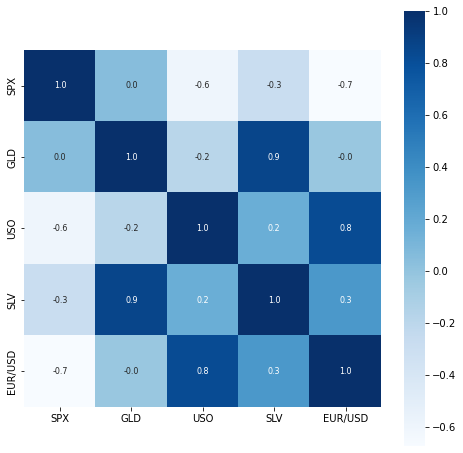

In [11]:
# constucting a heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot=True, annot_kws={'size': 8}, cmap = 'Blues')

In [12]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


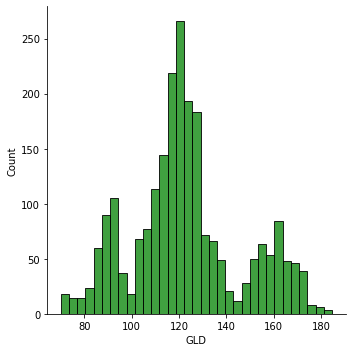

In [28]:
# Check the distribution of the GLD price
sns.displot(gold_data['GLD'], color= 'green')

Splitting the features and the target

In [14]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training
Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators = 100)

In [19]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [20]:
# Prediction on tets data
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.63549955  81.62269995 116.24120049 127.68450106 120.81220143
 154.73099772 149.99699902 126.02050017 117.32749878 125.83690111
 116.62450102 172.27650084 141.97699833 168.1874989  115.07250026
 117.89460023 137.62130343 169.96500069 159.71720341 157.84029939
 155.01160042 125.05500039 176.17589945 157.39260394 125.18140028
  93.84479972  77.83639952 120.56169984 119.06329901 167.37240016
  88.29300018 125.26890022  91.03950092 117.74690024 121.08419917
 136.33790088 115.4214013  115.20180076 147.34699945 107.26010065
 104.26110231  87.22189781 126.34890035 118.14370014 153.88899874
 119.53750038 108.35440015 108.04619809  93.08610021 127.23259751
  74.80990058 113.76359939 121.29079974 111.26829914 118.97019916
 120.55559972 159.14730002 168.17700133 147.09769679  86.04079918
  94.30480017  86.88079909  90.42599994 118.81370088 126.43760103
 127.46649975 169.55189971 122.1514993  117.15129923  98.65020015
 168.7865009  143.08249811 132.04930205 121.19680219 121.05429986
 119.66220

In [22]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [23]:
print("R squared error: ", error_score)

R squared error:  0.9888415594345726


Compare the actual values and predicted values

In [24]:
Y_test = list(Y_test)

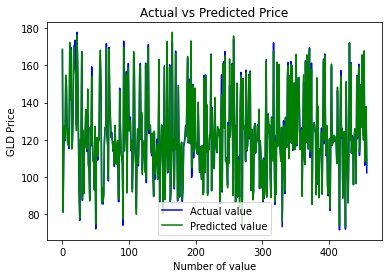

In [25]:
plt.plot(Y_test, color = 'blue', label= 'Actual value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()